In [2]:
pwd

'/home/jovyan/dsi/Capstone/ipynb'

In [1]:
%run ../src/__init__.py

In [2]:
%run ../src/load_data.py

/home/jovyan/dsi/Capstone/src/load_data.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['attendance'][x] = data.iloc[x + 1]['attendance']
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/pandas/core/g

In [3]:
bj_df = final_drop[final_drop['team']=='TOR'].sort_values('date',axis=0)

In [4]:
bj_df =  team_data_clean(bj_df)

/home/jovyan/dsi/Capstone/src/__init__.py:29: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,min_periods=0,center=False).mean()
  temp_ma = pd.rolling_mean(temp_run_ma_df['runs'],window=5,min_periods=0)


In [5]:
bj_df = add_rival('TOR', bj_df)

In [6]:
new_data=pd.read_pickle('../data/test_data_mlb.pkl')

In [7]:
bj_new = new_data[new_data['team'] == 'TOR'].sort_values('date',axis=0)

In [9]:
bj_new =  test_data_clean(bj_new)

/home/jovyan/dsi/Capstone/src/__init__.py:56: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,min_periods=0,center=False).mean()
  temp_ma = pd.rolling_mean(temp_run_ma_df['runs'],window=5,min_periods=0)


In [10]:
bj_new = add_rival('TOR', bj_new)

In [11]:
bj_data = pd.concat([bj_df, bj_new],axis=0)

In [13]:
bj_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2235 entries, 60738 to 2348
Data columns (total 70 columns):
attendance         2235 non-null int64
date               2235 non-null datetime64[ns]
div_rank           2235 non-null int64
double_header      2235 non-null float64
gb                 2235 non-null float64
opening_day        2235 non-null float64
opponent           2235 non-null object
record             2235 non-null float64
runs_allowed_ma    2235 non-null float64
runs_ma            2235 non-null float64
runs_pg            2235 non-null float64
streak             2235 non-null int64
team               2235 non-null object
1990               2235 non-null int64
1991               2235 non-null int64
1992               2235 non-null int64
1993               2235 non-null int64
1994               2235 non-null int64
1995               2235 non-null int64
1996               2235 non-null int64
1997               2235 non-null int64
1998               2235 non-null int64
1999  

,count,mean,std,min,25%,50%,75%,max,skew
runs,2235.0,4.879195,3.106105,0.0,3.000000,4.000000,7.000000,18.0,0.796886
runs_allowed,2235.0,4.658613,3.320032,0.0,2.000000,4.000000,7.000000,22.0,0.947752
innings,2235.0,9.159284,0.789165,0.0,9.000000,9.000000,9.000000,19.0,4.323645
record,2235.0,0.504408,0.099465,0.0,0.463843,0.500000,0.543344,1.0,-0.226636
div_rank,2235.0,3.120805,1.276357,0.0,2.000000,3.000000,4.000000,5.0,-0.313281
gb,2235.0,-7.732886,7.596500,-34.5,-12.500000,-6.500000,-2.000000,8.0,-0.736840
time,2235.0,173.132438,26.616367,0.0,156.000000,170.000000,187.000000,397.0,1.118709
attendance,2235.0,31872.840268,11909.614703,10314.0,21750.500000,30174.000000,43102.500000,50560.0,0.212045
runs_pg,2235.0,4.841751,0.867448,0.0,4.473684,4.802198,5.231238,13.0,0.335108
runs_ma,2235.0,4.881208,1.452261,0.8,3.800000,4.800000,5.800000,11.0,0.302758


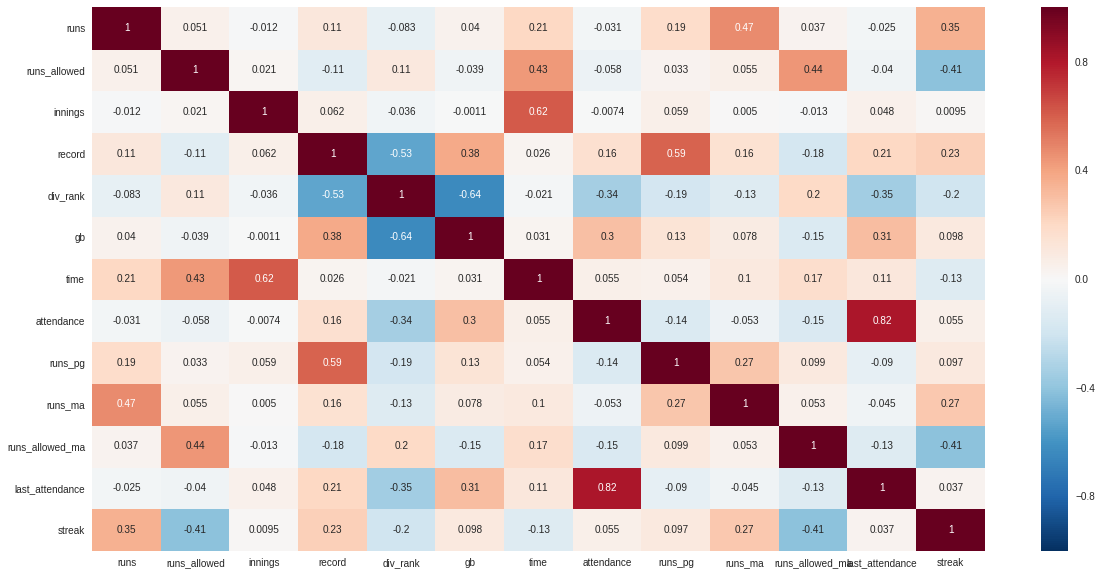

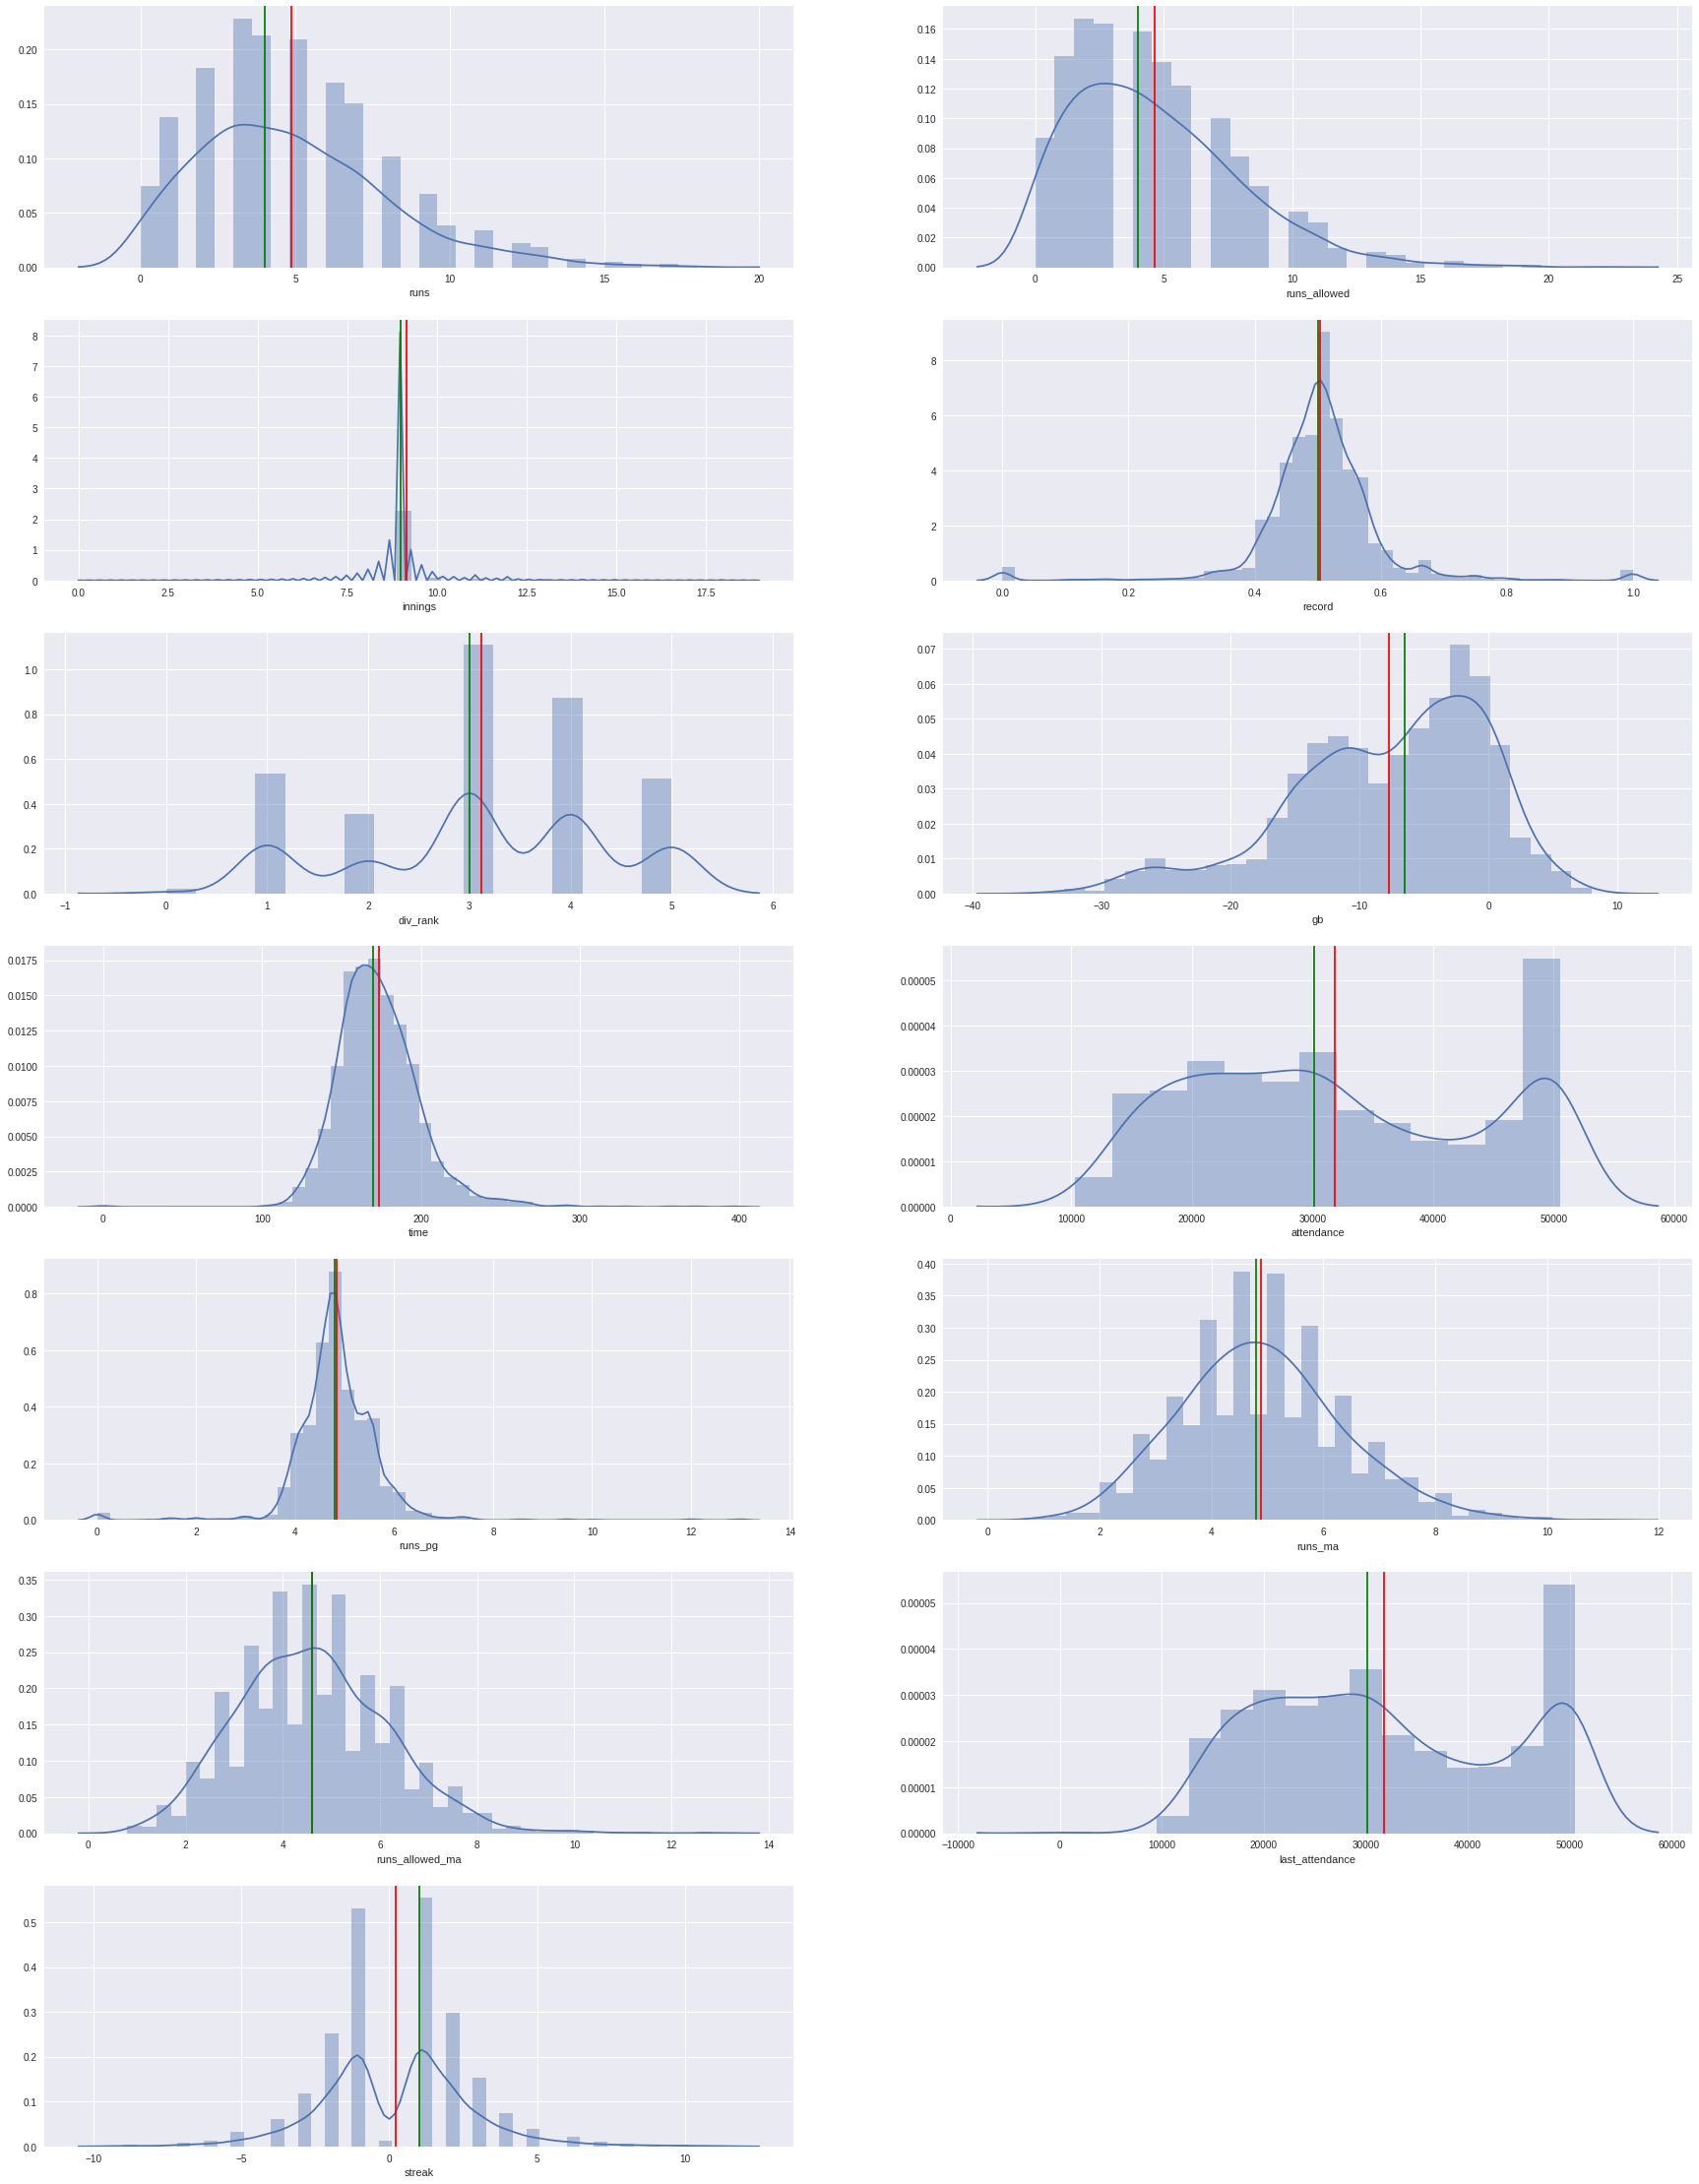

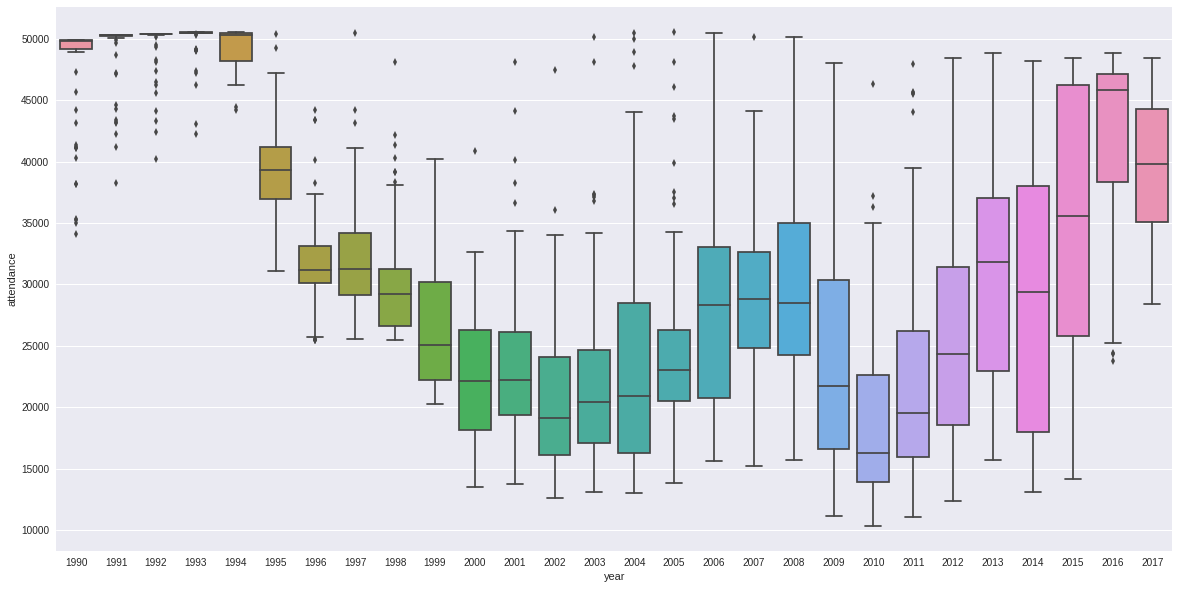

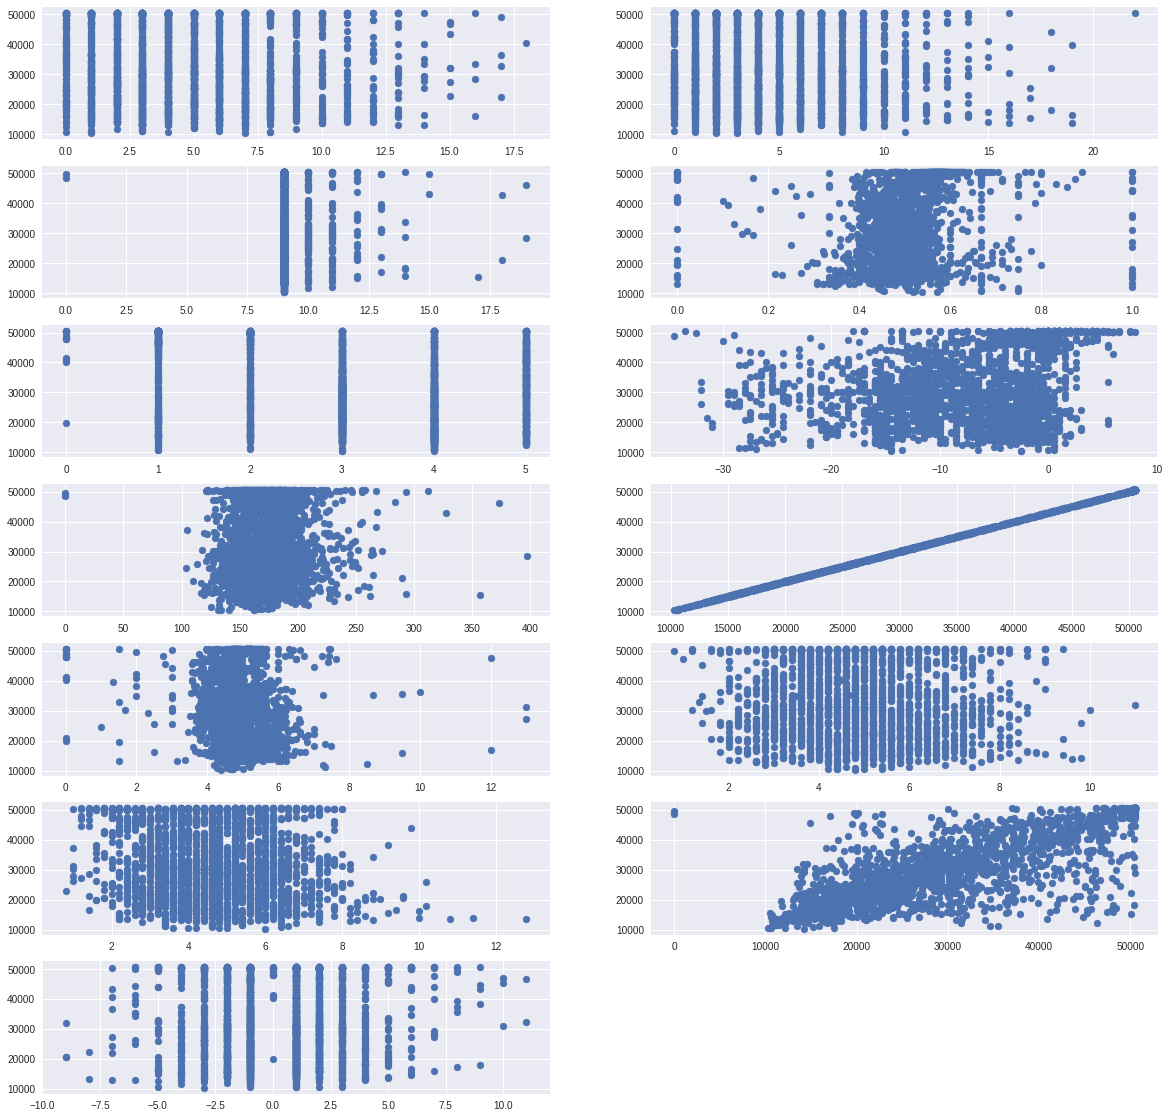

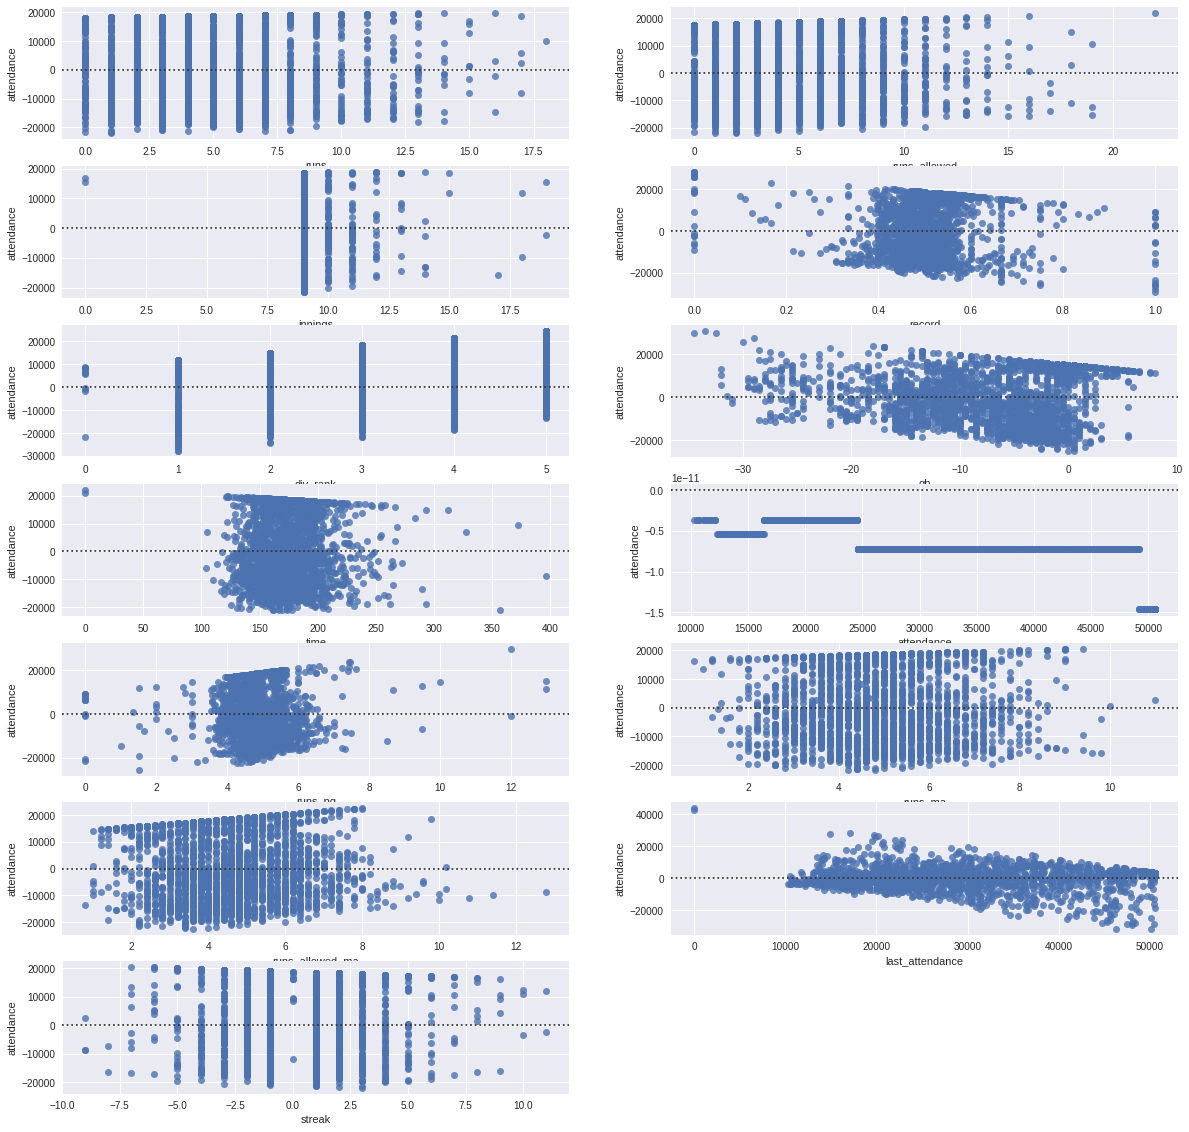

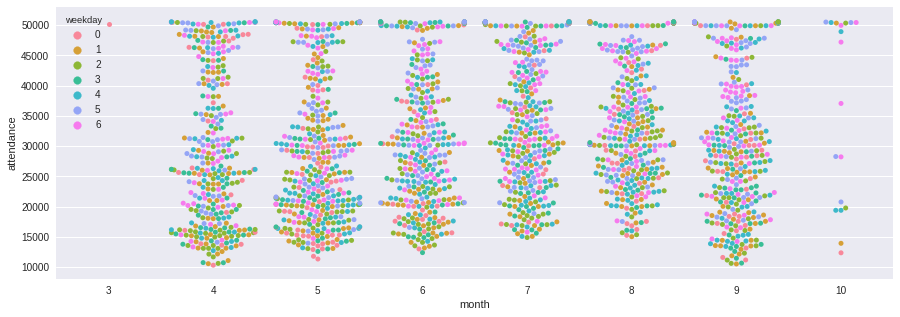

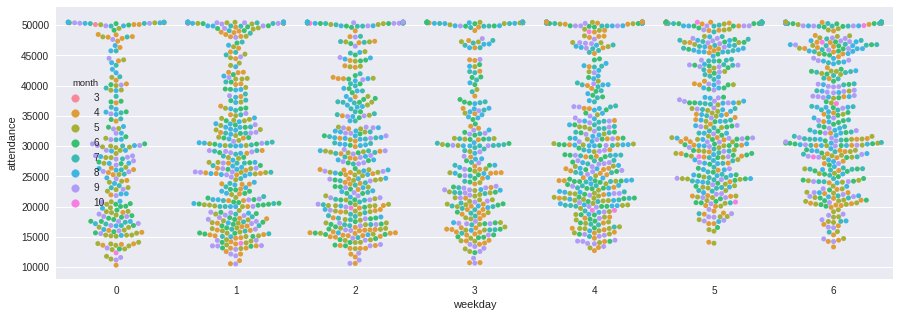

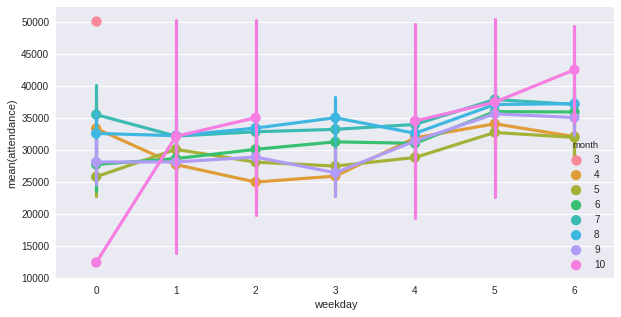

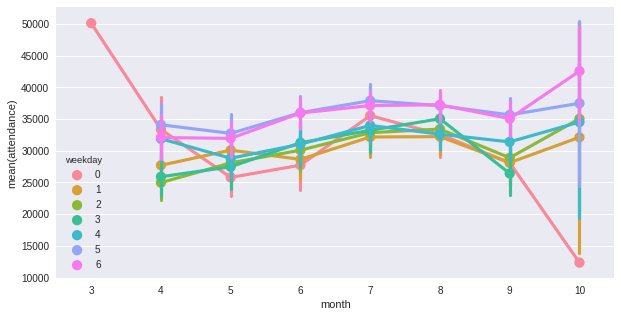

In [14]:
eda(bj_data)

In [15]:
annual_mean_r2(bj_data)

0.65816388199382125

In [16]:
bj_data, feature, target = model_fit_ready(bj_data)

In [17]:
bt = model_fit_score(feature, target)
bt

,train_score,test_score
Bagging_r2,0.955246,0.786596
Decision_tree_r2,1.000000,0.655304
Random_forest_r2,0.953956,0.789295
Gradient_boost_r2,0.850291,0.809462


In [18]:
co_f = feature.copy()
scale = StandardScaler()
feature_sca = pd.DataFrame(scale.fit_transform(co_f),columns=co_f.columns)

In [19]:
scale_fit = model_fit_score(feature_sca, target) 
scale_fit.columns =['scaled_train', 'scaled_test']
scale_fit

,scaled_train,scaled_test
Bagging_r2,0.951905,0.785044
Decision_tree_r2,1.000000,0.619348
Random_forest_r2,0.951597,0.788158
Gradient_boost_r2,0.850291,0.810045


In [20]:
score_table = pd.concat([bt, scale_fit],axis=1)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', DecisionTreeRegressor(criterion='mse', max_depth=5, max_features='auto',
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='random'))))
Feature top 10 ranking:
1. last_attendance (0.733404)
2. gb (0.149827)
3. time_D (0.025299)
4. opening_day (0.021700)
5. SA (0.017229)
6. april (0.014145)
7. T (0.011604)
8. 2014 (0.008240)
9. S (0.003952)
10. result_L (0.003511)


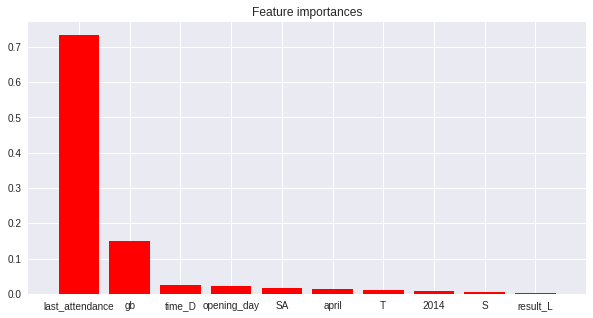

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=19, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))))
Feature top 10 ranking:
1. last_attendance (0.861900)
2. time_D (0.018903)
3. runs_pg (0.016829)
4. record (0.015050)
5. time_N (0.011009)
6. april (0.009435)
7. SA (0.009228)
8. gb (0.006992)
9. time (0.006836)
10. S (0.006262)


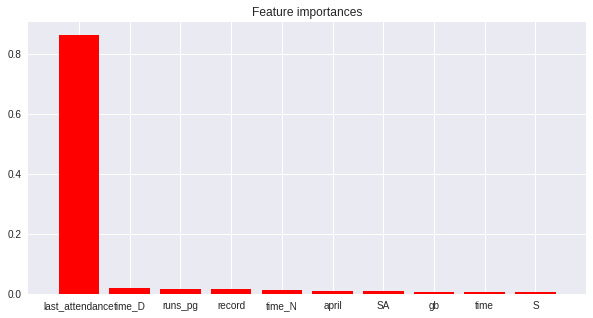

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=3,
             max_features='log2', max_leaf_nodes=None,
             min_impurity...s=200, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False))))
Feature top 10 ranking:
1. last_attendance (0.154535)
2. runs_pg (0.048640)
3. gb (0.046476)
4. div_rank (0.041705)
5. 1994 (0.039564)
6. record (0.039258)
7. time (0.033202)
8. opening_day (0.028882)
9. runs_ma (0.028797)
10. runs_allowed_ma (0.027427)


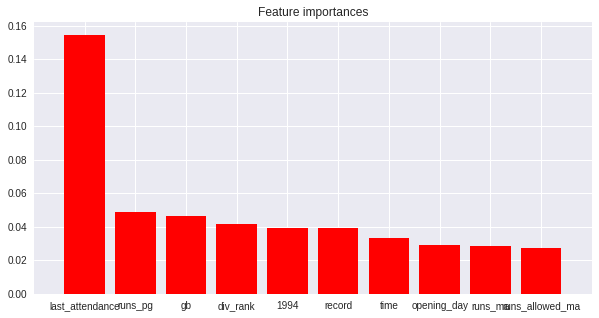

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0,
         max_samples=0.59999999999999998, n_estimators=23, n_jobs=-1,
         oob_score=False, random_state=None, verbose=0, warm_start=False))))
Feature top 10 ranking:
1. div_rank (0.719393)
2. double_header (0.031355)
3. gb (0.029484)
4. opening_day (0.016390)
5. record (0.015477)
6. runs_allowed_ma (0.014999)
7. runs_ma (0.014952)
8. runs_pg (0.012976)
9. streak (0.011809)
10. 1990 (0.009157)


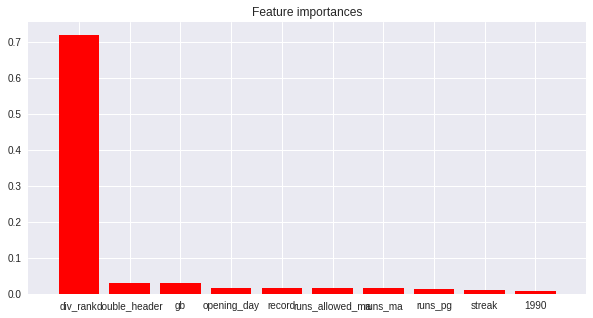

,train_score,test_score,scaled_train,scaled_test,P&O_train_score,P&O_test_score
Bagging_r2,0.955246,0.786596,0.951905,0.785044,0.922422,0.791023
Decision_tree_r2,1.000000,0.655304,1.000000,0.619348,0.738274,0.738364
Random_forest_r2,0.953956,0.789295,0.951597,0.788158,0.810321,0.779612
Gradient_boost_r2,0.850291,0.809462,0.850291,0.810045,0.860768,0.811252


In [21]:
grid_score(feature, target, score_table)

In [22]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(feature.values, i) for i in range(feature.shape[1])]
vif["features"] = feature_sca.columns

/opt/conda/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/opt/conda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1386: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [28]:
vif.sort_values('VIF',axis=0,ascending=False)[-16:-1]

,VIF,features
2,5.300637,gb
0,4.496022,div_rank
7,4.258172,runs_pg
4,3.895091,record
54,3.844035,last_attendance
58,2.791347,time
56,2.764688,runs_allowed
8,2.545404,streak
55,2.341225,runs
57,2.267549,innings


In [29]:
vif_feature = feature_sca.drop(['div_rank','runs_pg','gb'],axis=1)

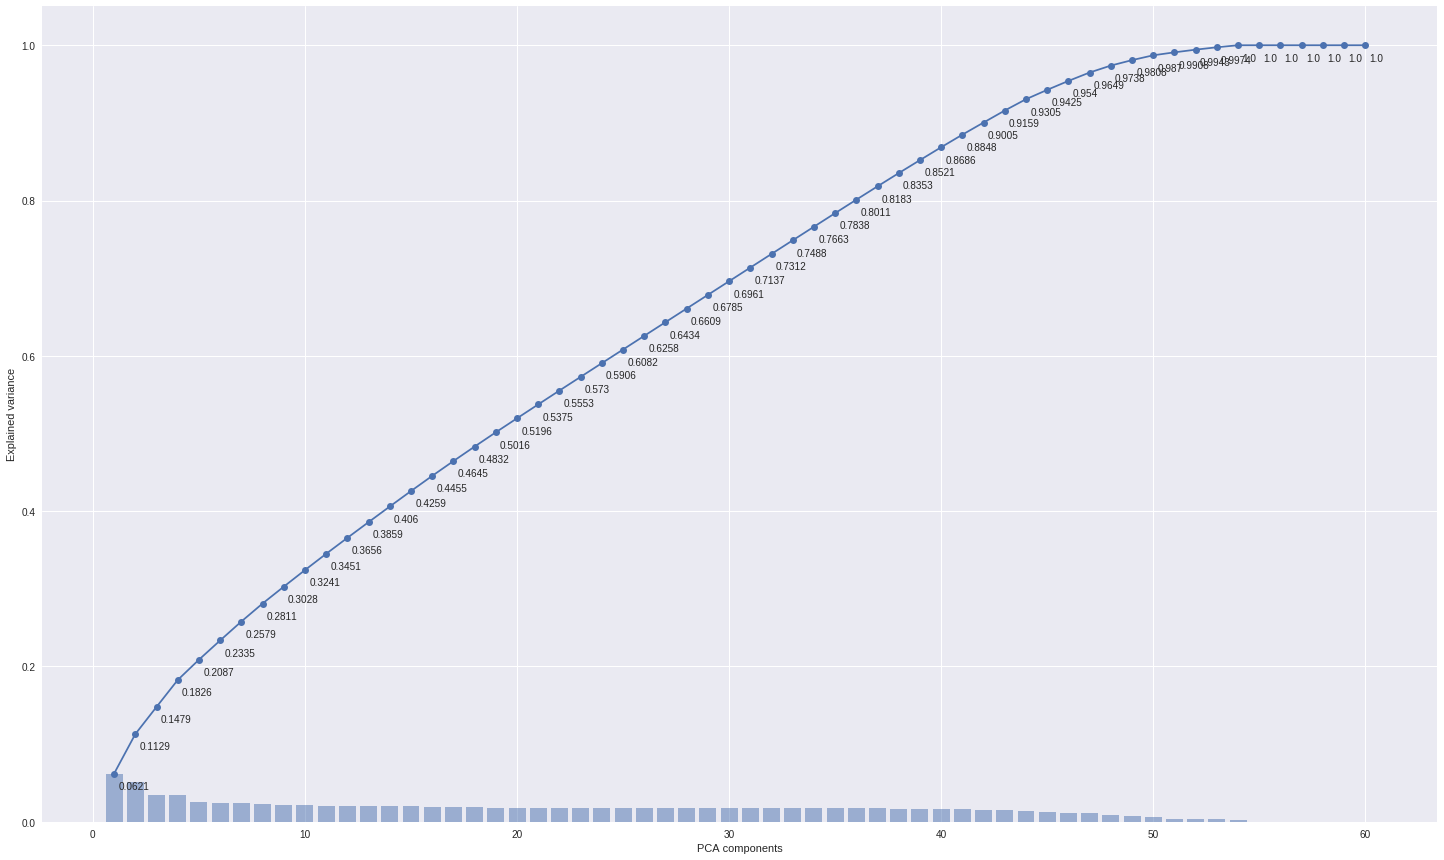

In [31]:
pca = PCA()
feature_pca = pd.DataFrame(pca.fit_transform(vif_feature))


plt.figure(figsize=(25,15))

X = np.arange(1,61)
cumulative_explained_variance_uci = np.cumsum(pca.explained_variance_ratio_)

plt.plot(X, cumulative_explained_variance_uci, '-o')
plt.bar(X, pca.explained_variance_ratio_, align='center', alpha=0.5)

for i, j in zip(X, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)), xy=(i+.2,j-.02))
    
plt.xlabel('PCA components')
plt.ylabel('Explained variance')

In [32]:
non_para_model_fit(vif_feature, target, 50)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


,P&O_train_score,P&O_test_score
Logistic_Regression,0.998322,0.002237
Support Vector Machine,0.820985,0.809242


In [33]:
inter_data, anova_feature, drop_list = interaction_feature(feature, target)

/opt/conda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:279: RuntimeWarning: invalid value encountered in true_divide
  corr /= row_norms(X.T)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


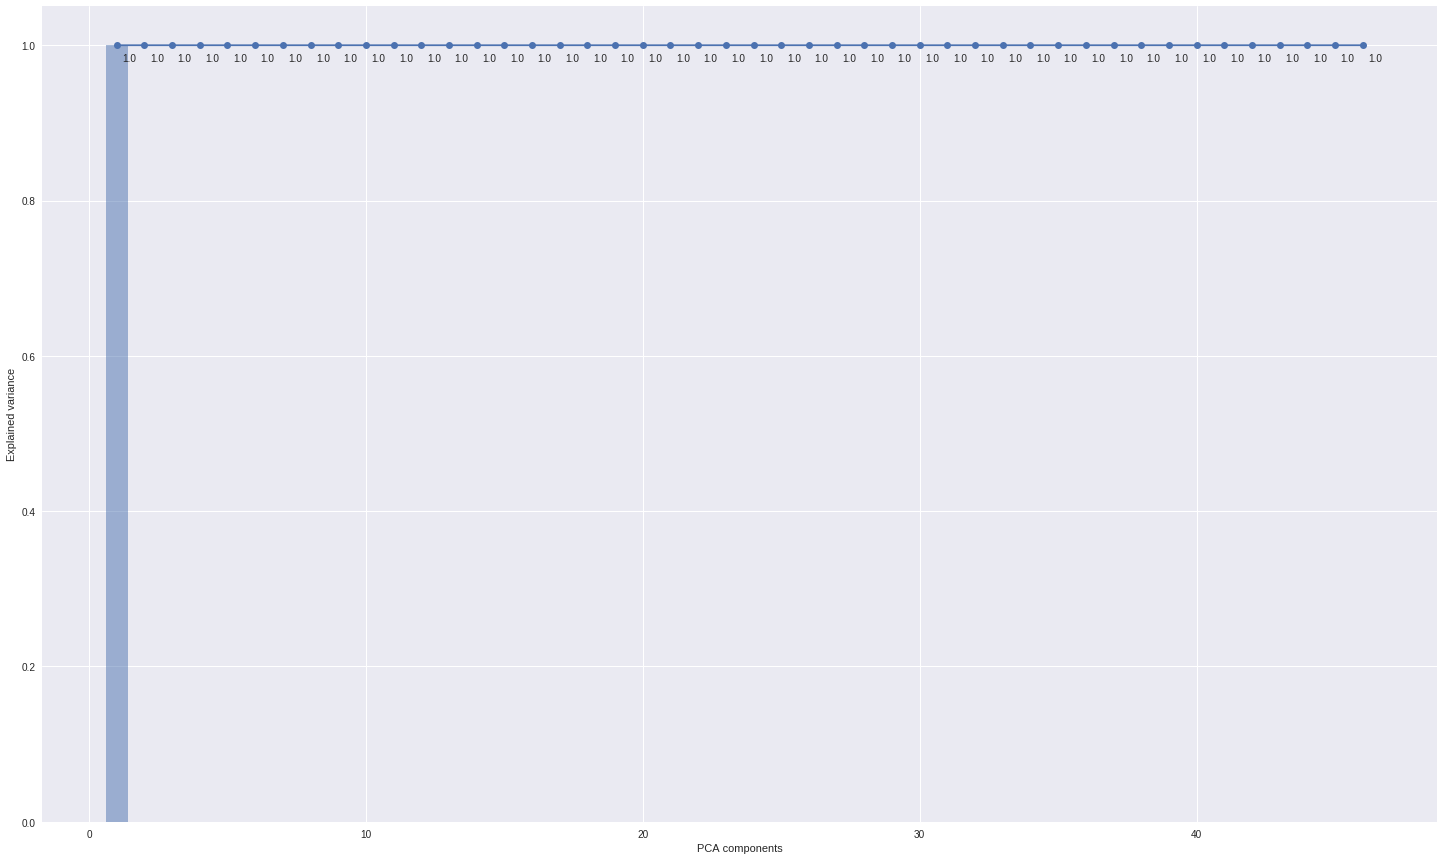

In [36]:
pca = PCA()
feature_pca = pd.DataFrame(pca.fit_transform(anova_feature))

plt.figure(figsize=(25,15))

X = np.arange(1,47)
cumulative_explained_variance_uci = np.cumsum(pca.explained_variance_ratio_)

plt.plot(X, cumulative_explained_variance_uci, '-o')
plt.bar(X, pca.explained_variance_ratio_, align='center', alpha=0.5)

for i, j in zip(X, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)), xy=(i+.2,j-.02))
    
plt.xlabel('PCA components')
plt.ylabel('Explained variance')

In [37]:
non_para_model_fit(anova_feature, target, 1)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


,P&O_train_score,P&O_test_score
Logistic_Regression,0.002796,0.000000
Support Vector Machine,0.815494,0.812855
